<a href="https://colab.research.google.com/github/kim-spirit/aipython/blob/main/%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df = pd.read_csv('example_data.csv')
print(df)


    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      20 non-null     int64  
 1   이름      17 non-null     object 
 2   학년      17 non-null     float64
 3   점수      20 non-null     int64  
 4   분반      20 non-null     object 
 5   공부시간    20 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


In [11]:
df.describe()

,학번,학년,점수,공부시간
count,20.00000,17.000000,20.000000,20.000000
mean,10.50000,2.823529,92.000000,4.450000
std,5.91608,1.185079,39.039791,5.771755
min,1.00000,1.000000,60.000000,0.000000
25%,5.75000,2.000000,69.750000,1.000000
50%,10.50000,3.000000,85.500000,3.000000
75%,15.25000,4.000000,94.250000,5.000000
max,20.00000,4.000000,200.000000,20.000000


In [12]:
df.isnull().sum()

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64

In [45]:
import numpy as np
#점수열 사분위수 계산
quartile_1, quartile_3 = np.percentile(df['점수'], [25,75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + 1.5*iqr
lower_whis = quartile_1 - 1.5*iqr
#공부시간열 사분위수 계산
quartile_1, quartile_3 = np.percentile(df['공부시간'], [25,75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + 1.5*iqr
lower_whis = quartile_1 - 1.5*iqr
#이상치 판별과 제거
outliers = df[(df['점수'] > 100) | (df['공부시간'] > 10)]
print(outliers)



    학번    이름   학년   점수 분반  공부시간
2    3   강감찬  4.0   91  C    20
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
18  19   이순신  1.0  200  A     3


In [14]:
duplicated = df.duplicated().sum()
print(duplicated)

0


In [15]:
df[df.duplicated()]

,학번,이름,학년,점수,분반,공부시간


In [16]:
df2 = df.drop_duplicates()
df2

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


In [46]:
df3 = df2.drop(index = outliers.index)
class_mean = df3.groupby('분반')['점수'].mean()
print(class_mean)

분반
A    77.75
B    77.25
C    80.50
Name: 점수, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

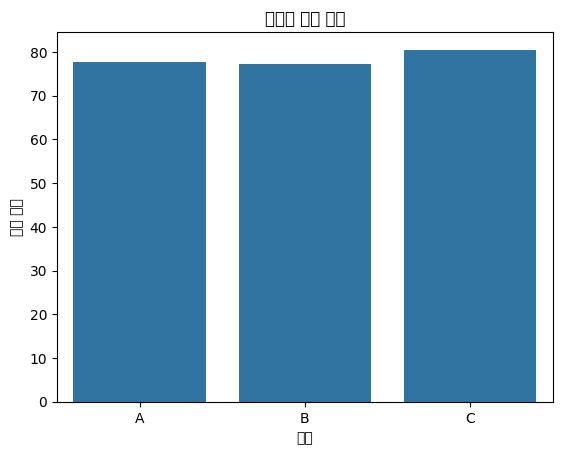

In [38]:
import matplotlib.pyplot as plt
class_mean = df3.groupby('분반')['점수'].mean()
sns.barplot(data = class_mean)
plt.title('분반별 평균 점수')
plt.xlabel('분반')
plt.ylabel('평균 점수')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

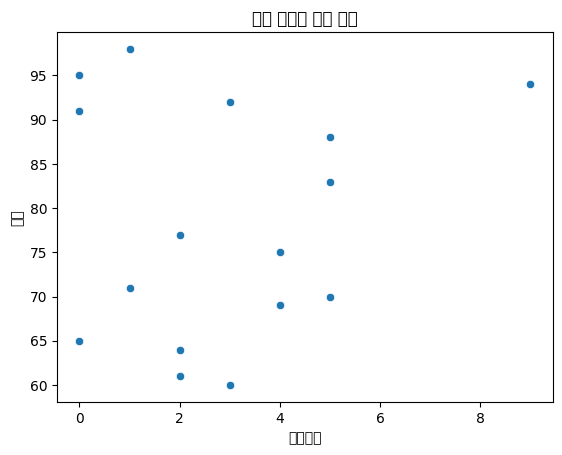

In [39]:
sns.scatterplot(x = '공부시간', y = '점수',data = df3)
plt.title('공부 시간과 점수 관계')
plt.show()